New features added and saved successfully!
RMSE without new features: 3.7524
RMSE with new features: 3.8771

Feature Importance:
       Feature  Importance
9          rm    0.594920
5       lstat    0.219302
3         dis    0.044741
15   log_crim    0.020080
13   lstat_sq    0.018896
2        crim    0.017497
10        tax    0.016900
7     ptratio    0.012858
0         age    0.012363
14  tax_to_rm    0.010798
1           b    0.009435
4       indus    0.008773
6         nox    0.007142
8         rad    0.003774
12     chas_1    0.001319
11         zn    0.001202


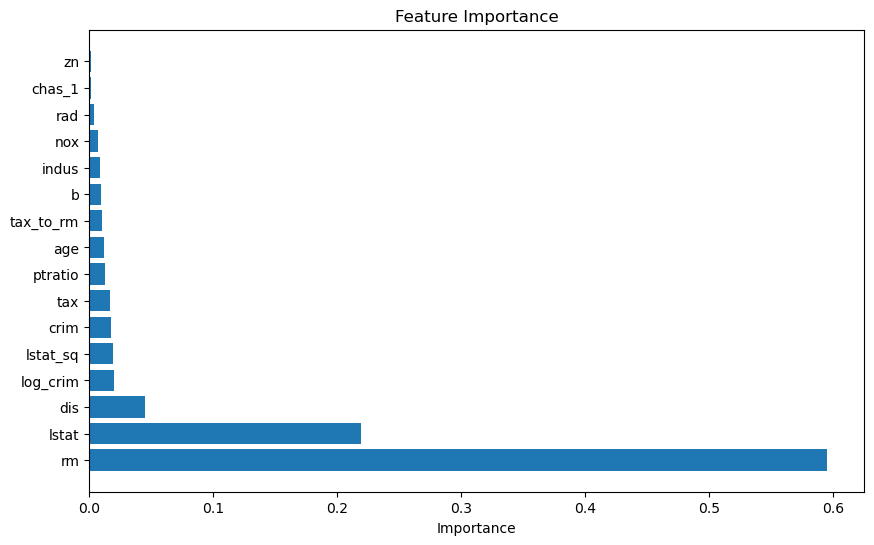

In [7]:
import numpy as np  # Import NumPy
import pandas as pd  # Import Pandas
import matplotlib.pyplot as plt  # Import Matplotlib for plotting
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load processed data
# df = pd.read_csv("../data/X_train_processed.csv")
df = pd.read_csv("../data/X_train_processed.csv", header=0)


# Ensure column names are clean
df.columns = df.columns.str.strip().str.lower()

# Create new features
df["lstat_sq"] = df["lstat"] ** 2  
df["tax_to_rm"] = df["tax"] / df["rm"]
df["log_crim"] = np.log1p(df["crim"])  # np is now defined

# Save the processed dataset separately
df.to_csv("../data/X_train_with_new_features.csv", index=False)
print("New features added and saved successfully!")

# Load target variable
y = pd.read_csv("../data/y_train.csv").values.ravel()  # Convert to 1D array

# Split data for testing model performance
X_original = pd.read_csv("../data/X_train_processed.csv")  # Without new features
X_new = df  # With new features

X_train_orig, X_val_orig, y_train, y_val = train_test_split(X_original, y, test_size=0.2, random_state=42)
X_train_new, X_val_new, _, _ = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Train model without new features
model_orig = RandomForestRegressor(random_state=42)
model_orig.fit(X_train_orig, y_train)
y_pred_orig = model_orig.predict(X_val_orig)
rmse_orig = np.sqrt(mean_squared_error(y_val, y_pred_orig))  # Manually compute RMSE

# Train model with new features
model_new = RandomForestRegressor(random_state=42)
model_new.fit(X_train_new, y_train)
y_pred_new = model_new.predict(X_val_new)
rmse_new = np.sqrt(mean_squared_error(y_val, y_pred_new))  # Manually compute RMSE

# Compare results
print(f"RMSE without new features: {rmse_orig:.4f}")
print(f"RMSE with new features: {rmse_new:.4f}")

# Evaluate feature importance
feature_importance = pd.DataFrame(
    {"Feature": X_new.columns, "Importance": model_new.feature_importances_}
).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["Feature"], feature_importance["Importance"])
plt.xlabel("Importance")
plt.title("Feature Importance")
plt.show()


In [9]:
print(df.columns) #just i want to confirm this headings are passing or not


Index(['age', 'b', 'crim', 'dis', 'indus', 'lstat', 'nox', 'ptratio', 'rad',
       'rm', 'tax', 'zn', 'chas_1', 'lstat_sq', 'tax_to_rm', 'log_crim'],
      dtype='object')
